In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, MaxNLocator
import matplotlib.colors as mcolors
from random import shuffle
import matplotlib
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

### Depth scaling

In [11]:
ROOT = '/Users/jonathanlu/Documents/data_sym/DS'
STATE = 'GHZ'
NUM_DEPTHS = 5
L_SET = [3,4,5]
NRUN = 10
queries = np.zeros((len(L_SET), NUM_DEPTHS, NRUN))
for i, L in enumerate(L_SET):
    for j in range(NUM_DEPTHS):
        queries[i,j] = np.load(f'{ROOT}/{STATE}/L{L}/queries_{j}_{STATE}.npy')

In [12]:
avgs_d = np.mean(queries, axis=-1)
stdevs_d = np.std(queries, axis=-1)
x_d = np.arange(NUM_DEPTHS)
avgs_d /= 10**5
stdevs_d /= 10**5

### Qubit scaling

In [13]:
ROOT = '/Users/jonathanlu/Documents/data_sym/LS'
STATE = 'GHZ'
NUM_DEPTHS = 4
L = 14
NRUN = 10
queries = np.zeros((NUM_DEPTHS, L, NRUN))
for i in range(NUM_DEPTHS):
    for j in range(L):
        queries[i,j] = np.load(f'{ROOT}/{STATE}/d{i}/queries_{j+1}_{STATE}.npy')

In [14]:
avgs_l = np.mean(queries, axis=-1)
stdevs_l = np.std(queries, axis=-1)
x_l = np.arange(L) + 1
avgs_l /= 10**5
stdevs_l /= 10**5

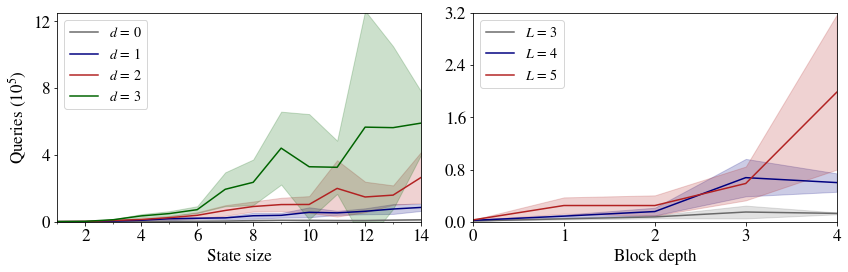

In [34]:
FONT_SIZE = 17
COLORS_D = ['dimgrey', 'navy', 'firebrick']
COLORS_L = ['dimgrey', 'navy', 'firebrick', 'darkgreen']
_, axes = plt.subplots(ncols=2, figsize=(12,4))
plt.rc('font', size=14)

ax = axes[0]
ax.tick_params(axis='both', labelsize=FONT_SIZE)
ax.yaxis.set_major_locator(MaxNLocator(4)) 
for i in range(4):
    ax.plot(x_l, avgs_l[i], label=rf'$d \,=\, ${i}', c=COLORS_L[i])
    ax.fill_between(x_l, avgs_l[i] - stdevs_l[i], avgs_l[i] + stdevs_l[i], alpha=0.2, color=COLORS_L[i])
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.set_xlim(left=1, right=14)
ax.set_ylim(0, 12.5)
ax.set_ylabel(r"Queries ($10^5$)", fontsize=FONT_SIZE)
ax.set_xlabel("State size", fontsize=FONT_SIZE)
ax.legend(loc='upper left')

ax = axes[1]
for j, L in enumerate(L_SET):
    ax.plot(x_d, avgs_d[j], label=rf'$L \,=\, ${L}', c=COLORS_D[j])
    ax.fill_between(x_d, avgs_d[j] - stdevs_d[j], avgs_d[j] + stdevs_d[j], alpha=0.2, color=COLORS_D[j])
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MaxNLocator(5)) 
    ax.set_xlabel("Block depth", fontsize=FONT_SIZE)
    ax.tick_params(axis='both', labelsize=FONT_SIZE)
    ax.set_xlim(0, L-1)
    ax.set_ylim(0, 3.2)
ax.legend(loc='upper left')
plt.tight_layout()
plt.savefig(f'/Users/jonathanlu/Documents/data_sym/LSDS.pdf')